# Capstone Project: Healthcare - PGP

Problem Statement:

* NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

* The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

* Build a model to accurately predict whether the patients in the dataset have diabetes or not.

## Week 1:
### Data Exploration:


* Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:


 1.Glucose
 
 2.BloodPressure
 
 3.SkinThickness
 
 4.Insulin
 
 5.BMI
 
 

 
 
* Visually explore these variables using histograms. Treat the missing values accordingly.

* There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [1]:
# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('health care diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**It is not showing any null values but , as per our problem statment value "0" is a null value so we should replace it.**

In [6]:
zero_to_null=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[zero_to_null] = df[zero_to_null].replace(0,np.NaN)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


**our '0' values are converted into null values**

In [8]:
def percent_missing(df):
    percent_nan = 100*df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [9]:
percent_nan=percent_missing(df)

In [10]:
percent_missing(df).sort_values(ascending = False)

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

**precentage of null values**

In [11]:
df.describe().transpose()    #Overview of our Data

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Distribution 

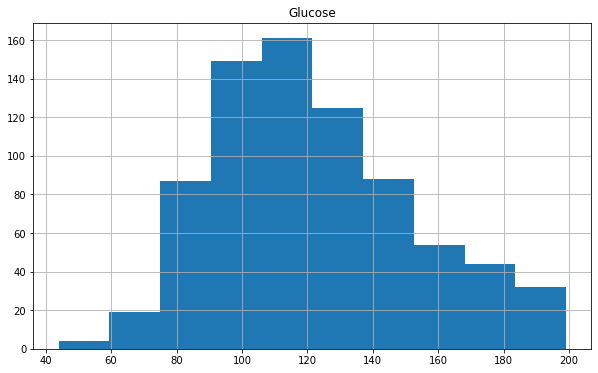

In [12]:
plt.figure(figsize=(10,6))
plt.title("Glucose")
df['Glucose'].hist();

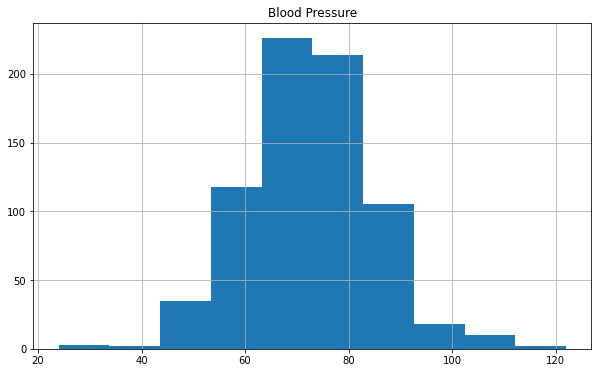

In [13]:
plt.figure(figsize=(10,6))
plt.title("Blood Pressure")
df['BloodPressure'].hist();

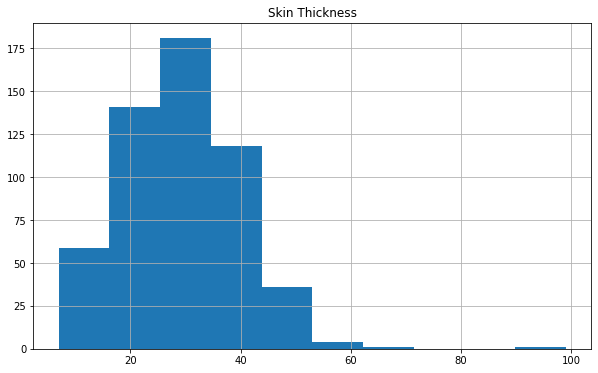

In [14]:
plt.figure(figsize=(10,6))
plt.title("Skin Thickness")
df['SkinThickness'].hist();

<AxesSubplot:title={'center':'BMI'}>

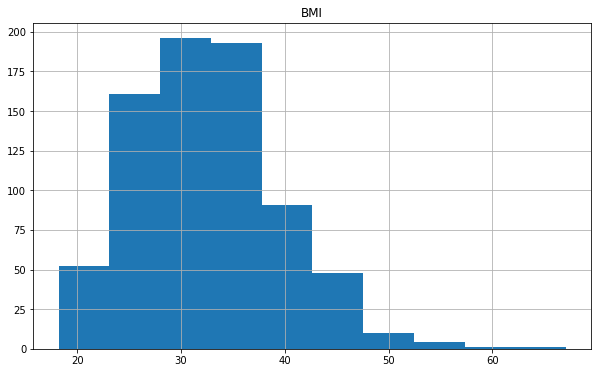

In [15]:
plt.figure(figsize=(10,6))
plt.title("BMI")
df['BMI'].hist()

<AxesSubplot:title={'center':'Insulin'}>

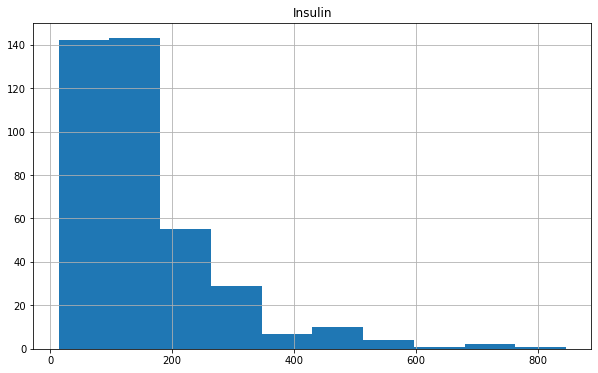

In [16]:
plt.figure(figsize=(10,6))
plt.title('Insulin')
df['Insulin'].hist()

**From above histograms, it is clear that Insulin has highly skewed data distribution and remaining 4 variables have relatively balanced data distribution therefore for treating missing value of Insulin we will use Median and for rest for four Variable we will use Mean**

In [17]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [18]:
mean_for_null = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
df[mean_for_null] = df[mean_for_null].fillna(df[mean_for_null].mean())

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


In [20]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

_Null values are Treated_

###  count (frequency) plot describing the data types and the count of variables:

<AxesSubplot:>

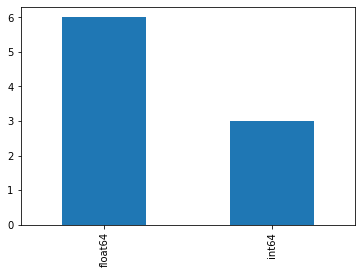

In [21]:
df.dtypes.value_counts().plot(kind='bar')

## Week 2 
**Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action:**

0    500
1    268
Name: Outcome, dtype: int64

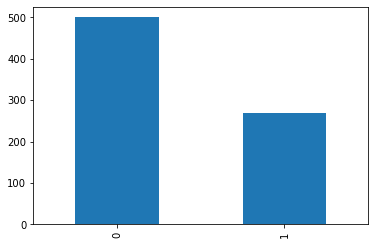

In [22]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome'].value_counts()

**Outcome is little skewed as**
* number of 0(Non-diabetic) = 500
* number of 1 (diabetic) = 268

So we will make data symmetrical using *SMOTE technique*

In [23]:
from imblearn.over_sampling import SMOTE


In [24]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE


In [26]:
df_X=df.drop('Outcome',axis=1)

In [27]:
df_y=df['Outcome']

In [28]:
print(df_X.shape,df_y.shape)

(768, 8) (768,)


In [29]:
df_X_resampled, df_y_resampled = SMOTE(random_state=108).fit_resample(df_X, df_y)
print(df_X_resampled.shape, df_y_resampled.shape)

(1000, 8) (1000,)


*now our data is balanced*

1    500
0    500
Name: Outcome, dtype: int64

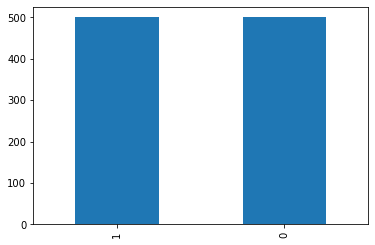

In [30]:
df_y_resampled.value_counts().plot(kind='bar')
df_y_resampled.value_counts()

In [31]:
df_resampled = pd.concat([df_X_resampled, df_y_resampled], axis=1)
df_resampled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.000000,72.000000,35.000000,125.000000,33.600000,0.627000,50,1
1,1,85.000000,66.000000,29.000000,125.000000,26.600000,0.351000,31,0
2,8,183.000000,64.000000,29.153420,125.000000,23.300000,0.672000,32,1
3,1,89.000000,66.000000,23.000000,94.000000,28.100000,0.167000,21,0
4,0,137.000000,40.000000,35.000000,168.000000,43.100000,2.288000,33,1
...,...,...,...,...,...,...,...,...,...
995,3,164.686765,74.249021,29.153420,125.000000,42.767110,0.726091,29,1
996,0,138.913540,69.022720,27.713033,127.283849,39.177649,0.703702,24,1
997,10,131.497740,66.331574,33.149837,125.000000,45.820819,0.498032,38,1
998,0,105.571347,83.238205,29.153420,125.000000,27.728596,0.649204,60,1


### visualizing data

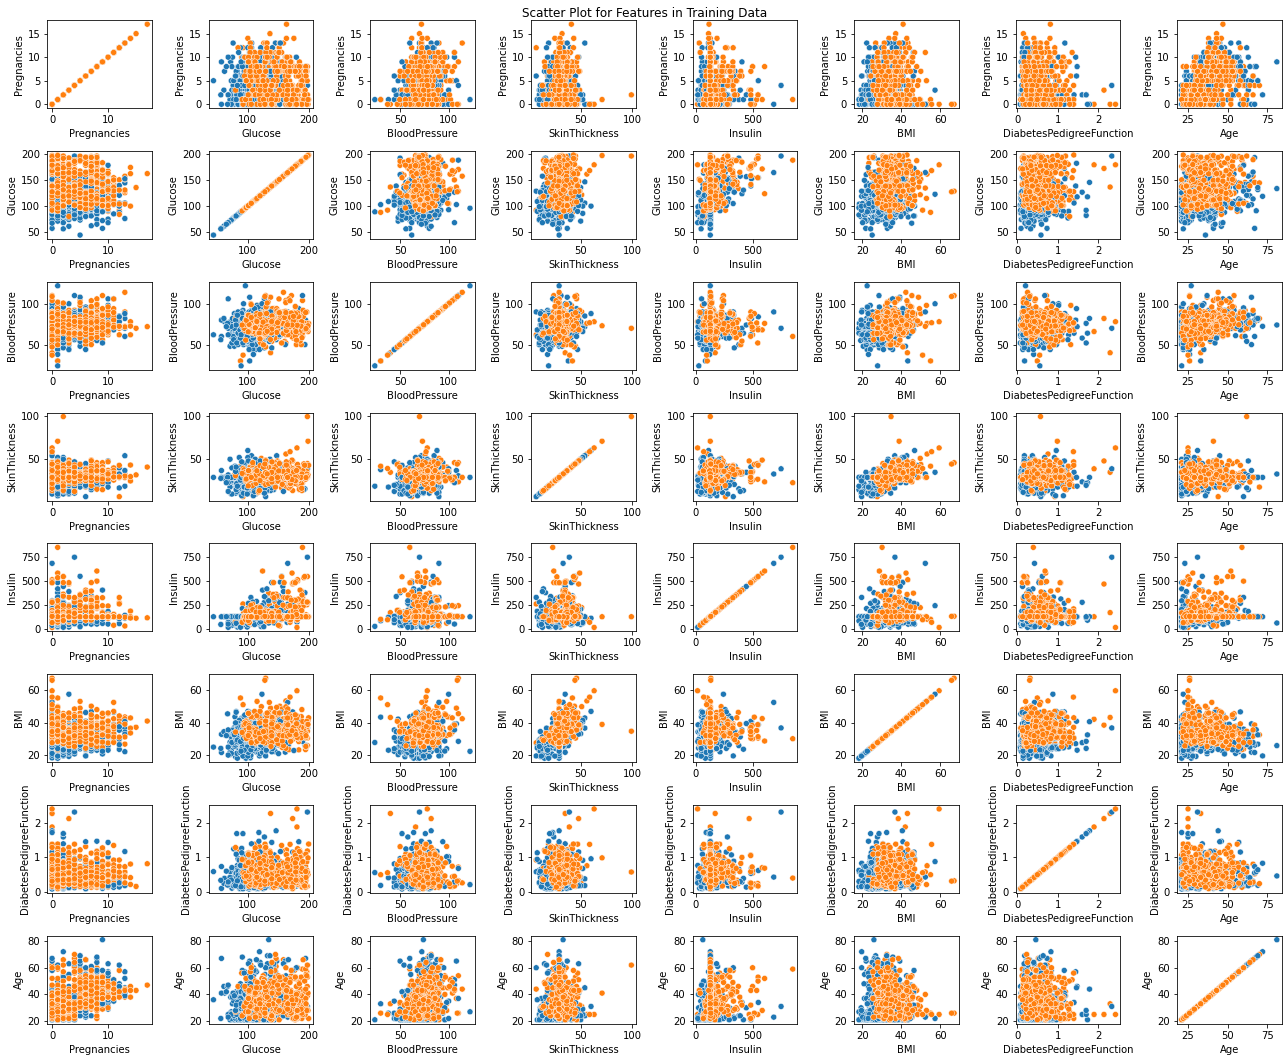

In [32]:
fig, axes = plt.subplots(8, 8, figsize=(18, 15))
fig.suptitle('Scatter Plot for Features in Training Data')

for i, col_y in enumerate(df_X_resampled.columns):
    for j, col_x in enumerate(df_X_resampled.columns):             
        sns.scatterplot(ax=axes[i, j], x=col_x, y=col_y, data=df_resampled, hue="Outcome", legend = False)

plt.tight_layout()

In [33]:
df_X_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000


In [34]:
df_resampled.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.079953,0.205232,0.082752,0.009365,0.021006,-0.040210,0.532660,0.193421
Glucose,0.079953,1.000000,0.200717,0.189776,0.418830,0.242501,0.138945,0.235522,0.500321
BloodPressure,0.205232,0.200717,1.000000,0.176496,0.034861,0.277565,-0.005850,0.332015,0.162788
SkinThickness,0.082752,0.189776,0.176496,1.000000,0.170719,0.538207,0.120799,0.117644,0.230017
Insulin,0.009365,0.418830,0.034861,0.170719,1.000000,0.168702,0.115187,0.096940,0.200911
BMI,0.021006,0.242501,0.277565,0.538207,0.168702,1.000000,0.177915,0.017529,0.334196
DiabetesPedigreeFunction,-0.040210,0.138945,-0.005850,0.120799,0.115187,0.177915,1.000000,0.010532,0.187519
Age,0.532660,0.235522,0.332015,0.117644,0.096940,0.017529,0.010532,1.000000,0.234059
Outcome,0.193421,0.500321,0.162788,0.230017,0.200911,0.334196,0.187519,0.234059,1.000000


**Creating Heatmap**


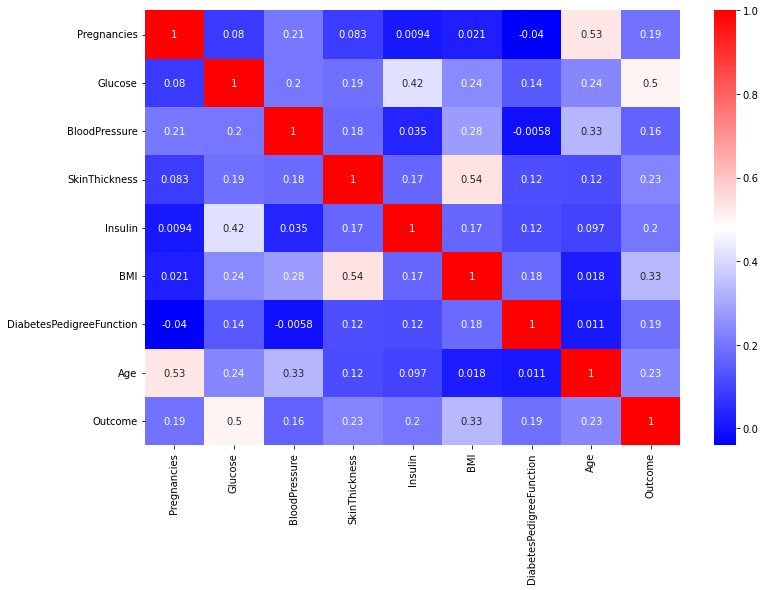

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df_resampled.corr(), cmap='bwr', annot=True);

### Observations -
*Glucose is the Most Prominent feature* 


*No feature can cleary define Outcome classes*



*So to make model we need all features*

## Week - 3

### Data Modeling:

**Devise strategies for model building. It is important to decide the right validation framework.**

Since it is a Classification problem,we will build following models -

1.Logistic Regression

2.K-nearest neighbour

3.Support Vevtor Machine

4.Decision Tree

5.Random Forest

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_X_resampled, df_y_resampled, test_size=0.15, random_state=10)

In [38]:
X_train.shape, X_test.shape

((850, 8), (150, 8))

In [39]:
models=[]
model_accuracy=[]
model_auc=[]
model_f1=[]

## Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr1=LogisticRegression(max_iter=300)

In [42]:
lr1.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [43]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, confusion_matrix, classification_report

In [44]:
lr1.score(X_test,y_test)

0.76

_using Gridsearch to tune hyperparameters_

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameter={'C': np.logspace(-5,5,50)}

In [47]:
grid_model=GridSearchCV(lr1,param_grid=parameter,cv=5,verbose=0)

In [48]:
grid_model.fit(df_X_resampled,df_y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': array([1.00000000e-05, 1.59985872e-05, 2.55954792e-05, 4.09491506e-05,
       6.55128557e-05, 1.04811313e-04, 1.67683294e-04, 2.68269580e-04,
       4.29193426e-04, 6.86648845e-04, 1.09854114e-03, 1.75751062e-03,
       2.81176870e-03, 4.49843267e-03, 7.19685673e-03, 1.15139540e-02,
       1.84206997e-02, 2.94705170e...
       7.90604321e-01, 1.26485522e+00, 2.02358965e+00, 3.23745754e+00,
       5.17947468e+00, 8.28642773e+00, 1.32571137e+01, 2.12095089e+01,
       3.39322177e+01, 5.42867544e+01, 8.68511374e+01, 1.38949549e+02,
       2.22299648e+02, 3.55648031e+02, 5.68986603e+02, 9.10298178e+02,
       1.45634848e+03, 2.32995181e+03, 3.72759372e+03, 5.96362332e+03,
       9.54095476e+03, 1.52641797e+04, 2.44205309e+04, 3.90693994e+04,
       6.25055193e+04, 1.00000000e+05])})

In [49]:
grid_model.best_params_

{'C': 13.257113655901108}

_Creating new model with obtained value of hyperparameter_

In [50]:
lr2=LogisticRegression(C=13.257113655901108,max_iter=300)

In [51]:
lr2.fit(X_train,y_train)

LogisticRegression(C=13.257113655901108, max_iter=300)

In [52]:
lr2.score(X_train,y_train)

0.7305882352941176

In [53]:
lr2.score(X_test, y_test)

0.7733333333333333

In [54]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

AUC: 0.884


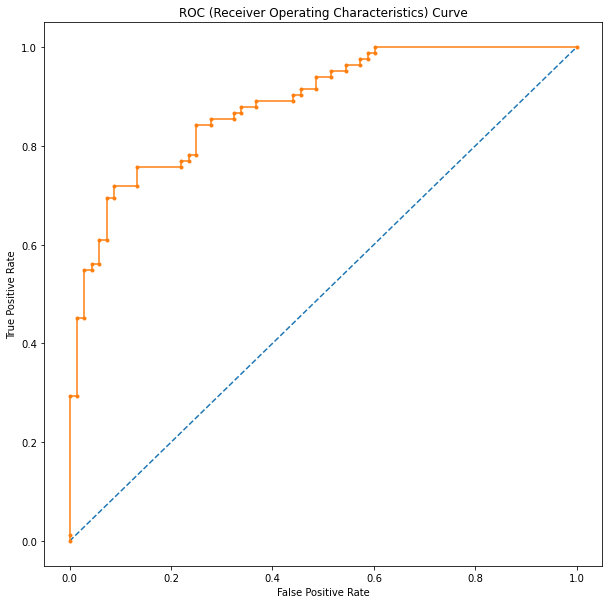

In [55]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = lr2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_lr = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_lr)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.790 auc_pr=0.951 ap=0.950


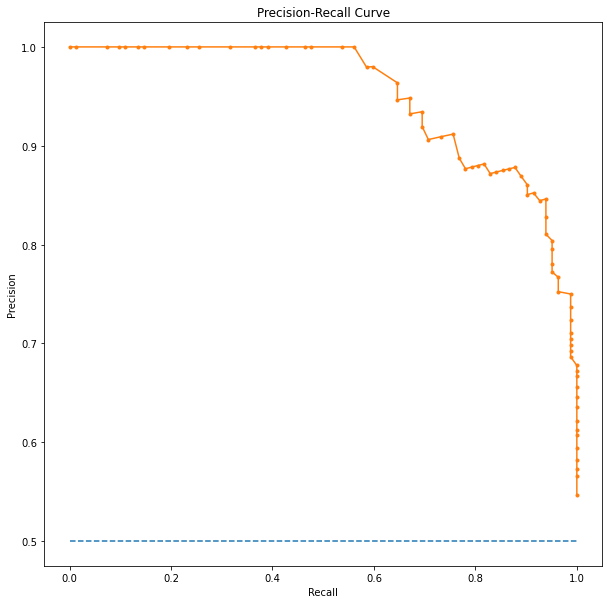

In [128]:
# Precision Recall Curve 

pred_y_test = lr2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_lr_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_lr_pr, ap))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [57]:
models.append('LR')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_lr)

## K Nearest Neighbour

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=3)

In [59]:
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
knn1.score(X_test,y_test)

0.7866666666666666

_using to gridsearch to tune hyperparameter_

In [61]:
knn_neighbors = [i for i in range(2,16)]
parameters = {
    'n_neighbors': knn_neighbors
}


In [62]:
gs_knn = GridSearchCV(estimator=knn1, param_grid=parameters, cv=5, verbose=0)
gs_knn.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15]})

In [63]:
gs_knn.best_params_

{'n_neighbors': 3}

In [64]:
gs_knn.best_params_

{'n_neighbors': 3}

In [65]:
gs_knn.best_score_

0.771

In [66]:
gs_knn.cv_results_['mean_test_score']

array([0.76 , 0.771, 0.765, 0.757, 0.757, 0.739, 0.744, 0.746, 0.744,
       0.755, 0.751, 0.755, 0.754, 0.749])

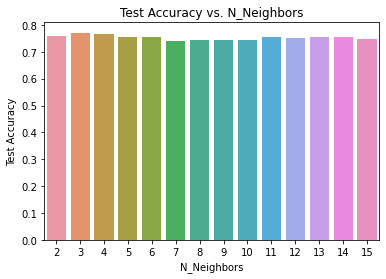

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(x=knn_neighbors, y=gs_knn.cv_results_['mean_test_score'])
plt.xlabel("N_Neighbors")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs. N_Neighbors");

_creating new model with obtained hyperparameter_

In [68]:
knn2=KNeighborsClassifier(n_neighbors=3)

In [69]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
knn2.score(X_train,y_train)

0.8835294117647059

AUC: 0.852


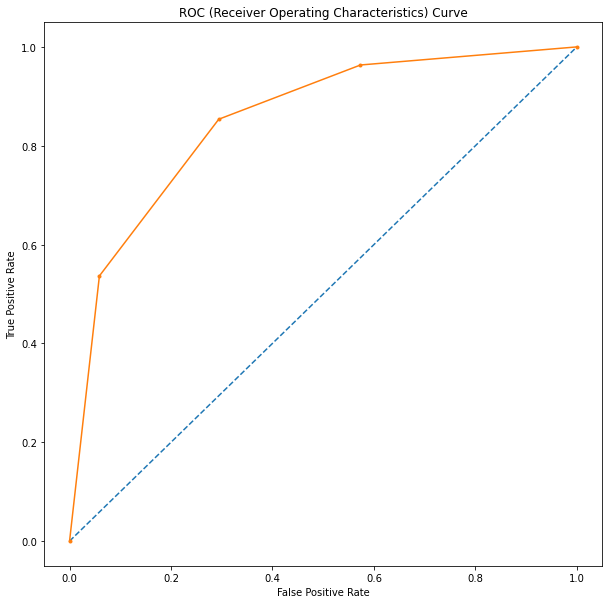

In [129]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = knn2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_knn = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_knn)
fpr, tpr, thresholds = roc_curve(y_test, probs)   # calculate roc curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.814 auc_pr=0.885 ap=0.832


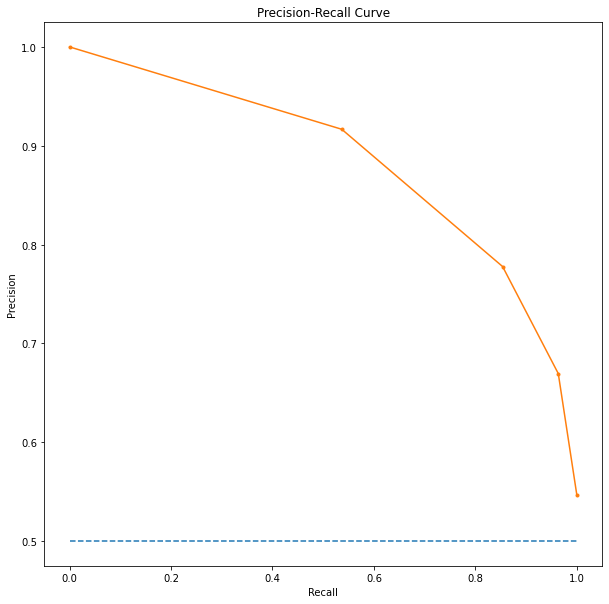

In [130]:
# Precision Recall Curve 

pred_y_test = knn2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_knn_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_knn_pr, ap))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [73]:
models.append('KNN')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_knn)

## Support Vector Machine

In [74]:
from sklearn.svm import SVC


In [75]:
svm1=SVC(kernel='rbf')

In [76]:
svm1.fit(X_train,y_train)

SVC()

In [77]:
svm1.score(X_train,y_train)

0.7282352941176471

In [78]:
svm1.score(X_test,y_test)

0.78

*Using Gridseach to tune hyperparameter*

In [79]:
param_svm={'C':[1, 5, 10, 15, 20, 25],'gamma':[0.001, 0.005, 0.0001, 0.00001]}


In [80]:
gs_svm=GridSearchCV(svm1,param_grid=param_svm,cv=5,verbose=0)

In [81]:
gs_svm.fit(df_X_resampled,df_y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 25],
                         'gamma': [0.001, 0.005, 0.0001, 1e-05]})

In [82]:
gs_svm.best_params_

{'C': 20, 'gamma': 0.005}

_Creating new model with obtained hyperparameter_

In [83]:
svm2 = SVC(kernel='rbf', C=20, gamma=0.005,probability=True)


In [84]:
svm2.fit(X_train,y_train)

SVC(C=20, gamma=0.005, probability=True)

In [85]:
svm2.score(X_train,y_train)

0.9941176470588236

In [86]:
svm2.score(X_test, y_test)

0.8133333333333334

AUC: 0.857


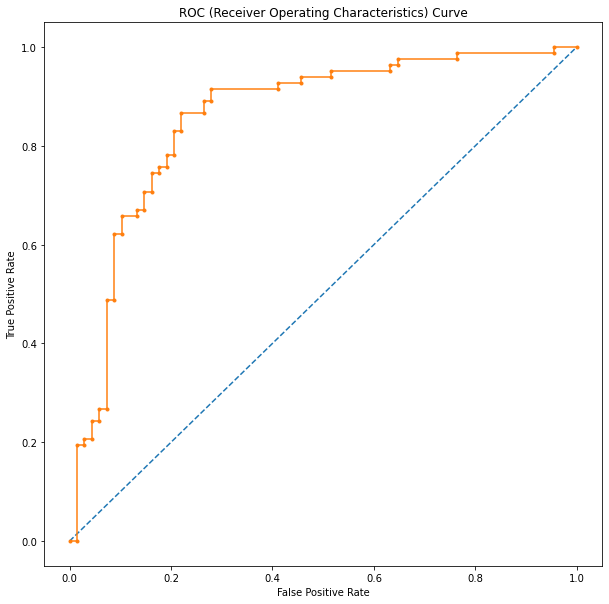

In [131]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = svm2.predict_proba(X_test)               # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_svm = roc_auc_score(y_test, probs)           # calculate AUC
print('AUC: %.3f' %auc_svm)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.829 auc_pr=0.830 ap=0.837


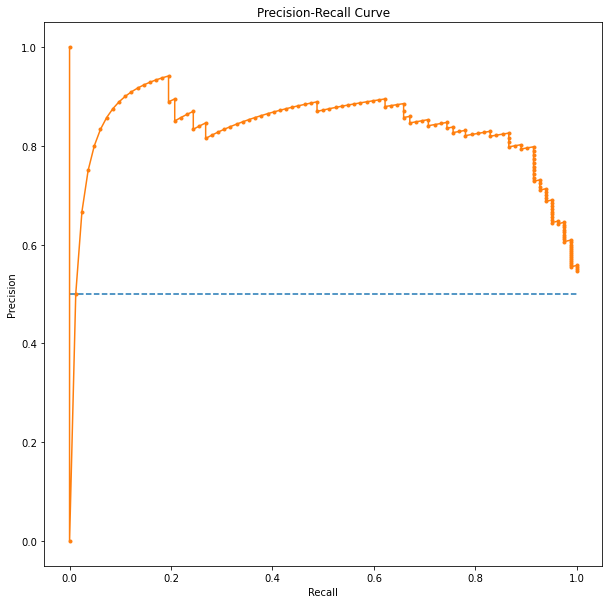

In [132]:
# Precision Recall Curve 

pred_y_test = svm2.predict(X_test)                                    # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_svm_pr = auc(recall, precision)                                   # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_svm_pr, ap))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [89]:
models.append('SVM')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_svm)

## Decision tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(random_state=0) 

In [91]:
dt1.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [92]:
dt1.score(X_test, y_test)

0.7733333333333333

*Tuning Hyperparameter*

In [93]:
param_dt = {
    'max_depth':[1,2,3,4,5,None]
}

In [94]:
gs_dt = GridSearchCV(dt1, param_grid = param_dt, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None]})

In [95]:
gs_dt.best_params_

{'max_depth': 4}

_Building New Model_

In [96]:
dt2 = DecisionTreeClassifier(max_depth=4)

In [97]:
dt2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [98]:
dt2.score(X_test, y_test)


0.82

AUC: 0.879


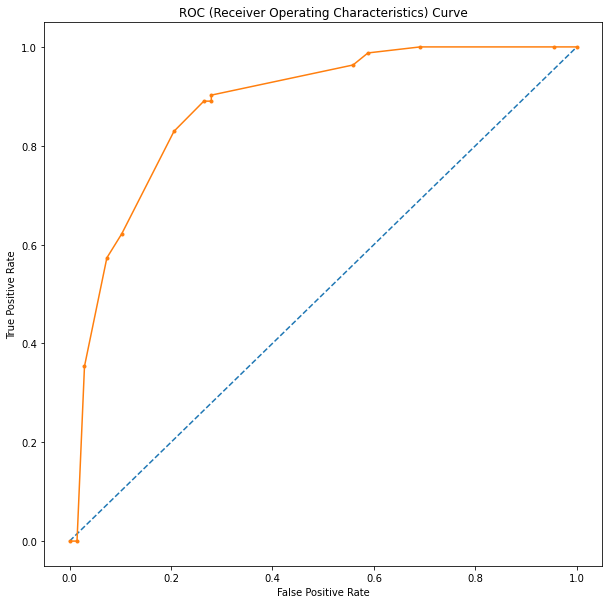

In [133]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = dt2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_dt = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.844 auc_pr=0.717 ap=0.868


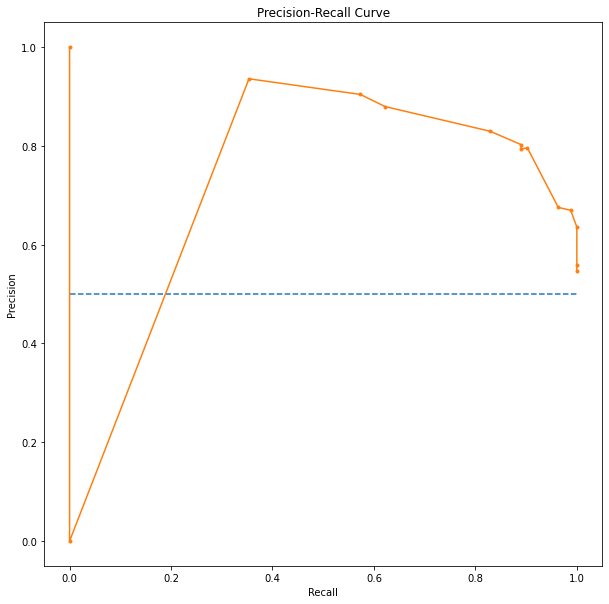

In [134]:
# Precision Recall Curve 

pred_y_test = dt2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_dt_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_dt_pr, ap))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [101]:
models.append('DT')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()

In [103]:
rf1 = RandomForestClassifier(random_state=0)


In [104]:
rf1.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [105]:
rf1.score(X_test, y_test)


0.8466666666666667

*Finding hyperparameter using Gridsearch*

In [106]:
param_rf = {
    'n_estimators': [50,100,150],
    'max_depth': [None,1,3,5,7],
    'min_samples_leaf': [1,3,5]
}

In [107]:
gs_dt = GridSearchCV(estimator=rf1, param_grid=param_rf, cv=5, verbose=0)
gs_dt.fit(df_X_resampled, df_y_resampled)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [None, 1, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [50, 100, 150]})

In [108]:
gs_dt.best_params_

{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100}

_Making new model_

In [109]:
rf2 = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=100)


In [110]:
rf2.fit(X_train,y_train)


RandomForestClassifier()

In [111]:
rf2.score(X_test,y_test)


0.8666666666666667

AUC: 0.939


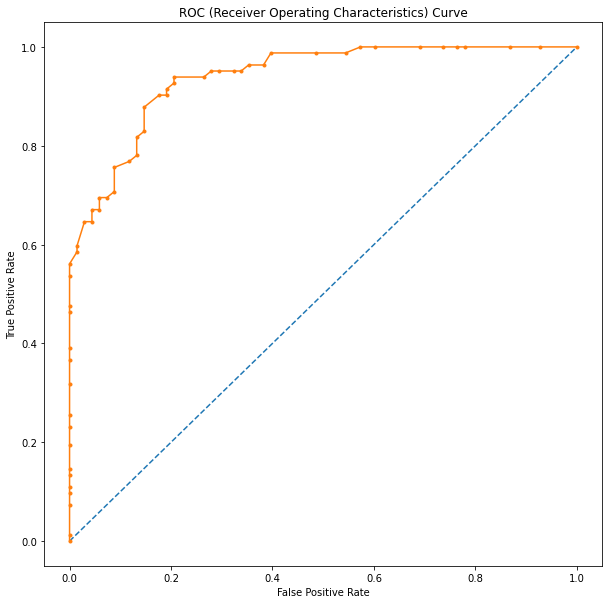

In [135]:
# Preparing ROC Curve (Receiver Operating Characteristics Curve)

probs = rf2.predict_proba(X_test)                # predict probabilities
probs = probs[:, 1]                              # keep probabilities for the positive outcome only

auc_rf = roc_auc_score(y_test, probs)            # calculate AUC
print('AUC: %.3f' %auc_rf)
fpr, tpr, thresholds = roc_curve(y_test, probs)  # calculate roc curve
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], linestyle='--')         # plot no skill
plt.plot(fpr, tpr, marker='.')                   # plot the roc curve for the model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC (Receiver Operating Characteristics) Curve");

f1=0.878 auc_pr=0.951 ap=0.950


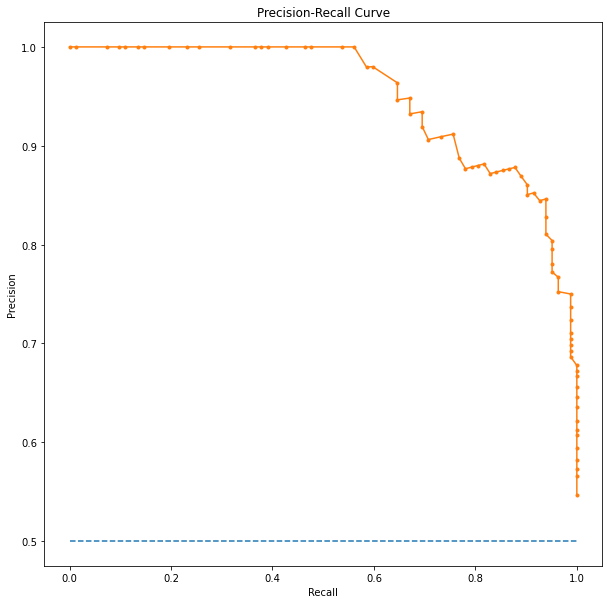

In [136]:
# Precision Recall Curve 

pred_y_test = rf2.predict(X_test)                                     # predict class values
precision, recall, thresholds = precision_recall_curve(y_test, probs) # calculate precision-recall curve
f1 = f1_score(y_test, pred_y_test)                                    # calculate F1 score
auc_rf_pr = auc(recall, precision)                                    # calculate precision-recall AUC
ap = average_precision_score(y_test, probs)                           # calculate average precision score
print('f1=%.3f auc_pr=%.3f ap=%.3f' % (f1, auc_rf_pr, ap))
plt.figure(figsize=(10,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')                          # plot no skill
plt.plot(recall, precision, marker='.')                               # plot the precision-recall curve for the model
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [114]:
models.append('RF')
model_accuracy.append(accuracy_score(y_test, pred_y_test))
model_f1.append(f1)
model_auc.append(auc_dt)

In [115]:
model_summary=pd.DataFrame(zip(models,model_accuracy,model_f1,model_auc),columns=['model','accuracy','f1_score','auc'])

In [116]:
model_summary

,model,accuracy,f1_score,auc
0,LR,0.773333,0.790123,0.884146
1,KNN,0.786667,0.813953,0.851865
2,SVM,0.813333,0.829268,0.857425
3,DT,0.820000,0.843931,0.879484
4,RF,0.866667,0.878049,0.879484


In [117]:
model_summary = model_summary.set_index('model')

In [118]:
model_summary

,accuracy,f1_score,auc
model,,,
LR,0.773333,0.790123,0.884146
KNN,0.786667,0.813953,0.851865
SVM,0.813333,0.829268,0.857425
DT,0.820000,0.843931,0.879484
RF,0.866667,0.878049,0.879484


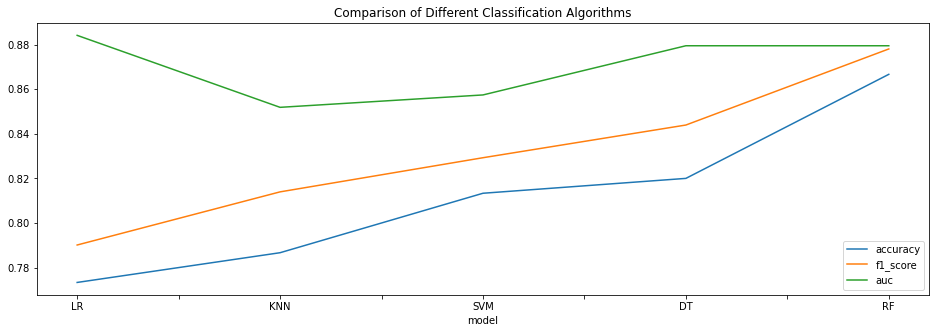

In [119]:
model_summary.plot(figsize=(16,5))
plt.title("Comparison of Different Classification Algorithms");

## Among all models we made, RandomForest has given best accuracy and f1_score. Therefore we will build final model using RandomForest.

## Final Model


In [120]:
final_model=rf2

In [137]:
rf2.fit(X_train,y_train)

RandomForestClassifier()

In [138]:
rf2.score(X_test, y_test)


0.8666666666666667

In [139]:
rf2.feature_importances_

array([0.06250617, 0.24800571, 0.09076502, 0.07908452, 0.10296301,
       0.1777608 , 0.11336801, 0.12554675])

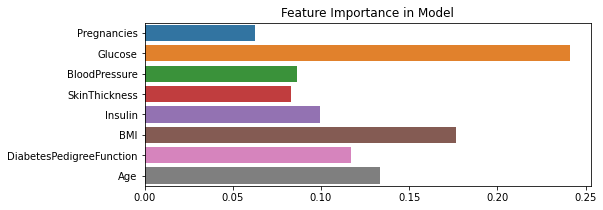

In [140]:
plt.figure(figsize=(8,3))
sns.barplot(y=X_train.columns, x=rf1.feature_importances_);
plt.title("Feature Importance in Model");

## Week -4 
Data Modeling
Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used:

In [121]:
cr = classification_report(y_test, final_model.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        68
           1       0.88      0.88      0.88        82

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



In [122]:
confusion = confusion_matrix(y_test, final_model.predict(X_test))
print("Confusion Matrix:\n", confusion)

Confusion Matrix:
 [[58 10]
 [10 72]]


In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)
Precision = TP/(TP+FP)
Sensitivity = TP/(TP+FN)                     # also called recall
Specificity = TN/(TN+FP)

In [125]:
print("Accuracy: %.3f"%Accuracy)
print("Precision: %.3f"%Precision)
print("Sensitivity: %.3f"%Sensitivity)
print("Specificity: %.3f"%Specificity)
print("AUC: %.3f"%auc_rf)

Accuracy: 0.867
Precision: 0.878
Sensitivity: 0.878
Specificity: 0.853
AUC: 0.939


*Accuracy represents the number of correctly classified data instances over the total number of data instances*

*The precision is calculated as the ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). The precision measures the model's accuracy in classifying a sample as positive*

*Sensitivity is a measure of how well a machine learning model can detect positive instances. It is also known as the true positive rate (TPR) or recall. Sensitivity is used to evaluate model performance because it allows us to see how many positive instances the model was able to correctly identify.*

*Specificity measures the proportion of true negatives that are correctly identified by the model. This implies that there will be another proportion of actual negative which got predicted as positive and could be termed as false positives*